In [2]:

import os
import glob
from PIL import Image
import numpy as np
import cv2


In [2]:
#ImageResize Module


#data 파일에 들어있는 여러이미지 일괄 변환해 resize파일에 저장


#초기 파일 위치에서 data파일로 이동
os.chdir('./data')
files=os.listdir()
#data 파일에 존재하는 원본 jpg나 png 파일에 접근 
for f in files:
    title, ext = os.path.splitext(f)
    if ext in ['.jpg', '.png']:
        img = Image.open(f)
        
         #lanczos필터를 사용해 높은 품질의 이미즈를 얻는다.
        img_resize = img.resize((380, 380),Image.LANCZOS)
        
        #resize디렉토리로 이동 후 저장
        os.chdir('./resize')
        print(os.getcwd() )
        img_resize.save( title+'resized' + ext)
        
        #다시 data 디렉토리로 복귀
        os.chdir("../")
#초기 디렉토리로 복귀
os.chdir("../")

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize


In [2]:
#ImageCuttingAndLabeling Module


#imageresizemodule로 만들어진 파일들이 준비되어있어야한다.
#완성된 image cutting and 파일로 labeling
#모든 파일 숫자별로 10개씩 쪼개고 파일 별 label

#현재 디렉토리 위치 출력
print(os.getcwd() )

#실행시 디렉토리 위치는 실행파일있는 곳으로 하자.


#resized된 파일이 있는곳으로 이동
os.chdir('./data/resize/')


#디렉토리에 있는 파일 출력
print(os.listdir())
files=os.listdir()

#파일에 접근 시작
for idx, file in enumerate(files):
    fname, ext = os.path.splitext(file)
    
    #디렉토리에있는 파일중 jpg,png파일만 읽어들임
    if ext in ['.jpg','.png']:
        path=os.getcwd()
        print(path,file)
        im = Image.open(file)
        
        for i in range(10):
            #해당 Label파일에 cutting된 사진 저장 
            os.chdir(f"./{i}")
            
            for j in range(10):
                #(x,y,x+width,y+height)
                crop_image = im.crop((20+i*34, 20+j*34, 54+i*34 , 54+j*34))
                
                #pixel값에 접근하기 위해 load (crop_image와 연결되어 있어 값을 바꾸기만하면됨)
                load_image=crop_image.load()
                for x in [0,1,2,31,32,33]:
                    for y in range(34):
                        load_image[x,y]=(255,255,255)
                for y in [0,1,2,31,32,33]:
                     for x in range(34):
                        load_image[x,y]=(255,255,255)   
                        
                    
                
                
                #승종님이 binary작업 후 resize 할 것
                crop_image = crop_image.resize((28, 28),Image.LANCZOS)
                
                #gray 변환도 승종님이 binary작업하면서 할 것
                crop_image=crop_image.convert('L')
                
                #
                crop_image.save('Img' + str(idx)+'_'+str(i)+'_'+ str(j) + '.jpg')
                print('Img' + str(idx)+'_'+str(i)+'_'+ str(j) + '.jpg저장')
                
            #모두 잘라낸뒤 resize파일로 돌아가기
            os.chdir("../")
            
# 실행이 끝나면 resize파일이다.
#다시 기본디렉토리로 이동
os.chdir("../")
os.chdir("../")



E:\전민재\전공\3학년\머신러닝\개인작업
['MNIST19resized.jpg', 'MNIST20resized.jpg', 'MNIST8resized.jpg', 'MNIST9resized.jpg', 'MNIST10resized.jpg', 'MNIST11resized.jpg', 'MNIST12resized.jpg', 'MNIST13resized.jpg', 'MNIST14resized.jpg', 'MNIST15resized.jpg', 'MNIST16resized.jpg', 'MNIST17resized.jpg', 'MNIST18resized.jpg', 'MNIST1resized.jpg', 'MNIST2resized.jpg', 'MNIST3resized.jpg', 'MNIST4resized.jpg', 'MNIST5resized.jpg', 'MNIST6resized.jpg', 'MNIST7resized.jpg', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize MNIST19resized.jpg
Img0_0_0.jpg저장
Img0_0_1.jpg저장
Img0_0_2.jpg저장
Img0_0_3.jpg저장
Img0_0_4.jpg저장
Img0_0_5.jpg저장
Img0_0_6.jpg저장
Img0_0_7.jpg저장
Img0_0_8.jpg저장
Img0_0_9.jpg저장
Img0_1_0.jpg저장
Img0_1_1.jpg저장
Img0_1_2.jpg저장
Img0_1_3.jpg저장
Img0_1_4.jpg저장
Img0_1_5.jpg저장
Img0_1_6.jpg저장
Img0_1_7.jpg저장
Img0_1_8.jpg저장
Img0_1_9.jpg저장
Img0_2_0.jpg저장
Img0_2_1.jpg저장
Img0_2_2.jpg저장
Img0_2_3.jpg저장
Img0_2_4.jpg저장
Img0_2_5.jpg저장
Img0_2_6.jpg저장
Img0_2_7.jpg저장
Img0_2_8.jpg저장
Img0

Img4_9_8.jpg저장
Img4_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize MNIST11resized.jpg
Img5_0_0.jpg저장
Img5_0_1.jpg저장
Img5_0_2.jpg저장
Img5_0_3.jpg저장
Img5_0_4.jpg저장
Img5_0_5.jpg저장
Img5_0_6.jpg저장
Img5_0_7.jpg저장
Img5_0_8.jpg저장
Img5_0_9.jpg저장
Img5_1_0.jpg저장
Img5_1_1.jpg저장
Img5_1_2.jpg저장
Img5_1_3.jpg저장
Img5_1_4.jpg저장
Img5_1_5.jpg저장
Img5_1_6.jpg저장
Img5_1_7.jpg저장
Img5_1_8.jpg저장
Img5_1_9.jpg저장
Img5_2_0.jpg저장
Img5_2_1.jpg저장
Img5_2_2.jpg저장
Img5_2_3.jpg저장
Img5_2_4.jpg저장
Img5_2_5.jpg저장
Img5_2_6.jpg저장
Img5_2_7.jpg저장
Img5_2_8.jpg저장
Img5_2_9.jpg저장
Img5_3_0.jpg저장
Img5_3_1.jpg저장
Img5_3_2.jpg저장
Img5_3_3.jpg저장
Img5_3_4.jpg저장
Img5_3_5.jpg저장
Img5_3_6.jpg저장
Img5_3_7.jpg저장
Img5_3_8.jpg저장
Img5_3_9.jpg저장
Img5_4_0.jpg저장
Img5_4_1.jpg저장
Img5_4_2.jpg저장
Img5_4_3.jpg저장
Img5_4_4.jpg저장
Img5_4_5.jpg저장
Img5_4_6.jpg저장
Img5_4_7.jpg저장
Img5_4_8.jpg저장
Img5_4_9.jpg저장
Img5_5_0.jpg저장
Img5_5_1.jpg저장
Img5_5_2.jpg저장
Img5_5_3.jpg저장
Img5_5_4.jpg저장
Img5_5_5.jpg저장
Img5_5_6.jpg저장
Img5_5_7.jpg저장
Img5_5_8.jpg저장
Img5_5_9.jpg저장
Img5_6_0.jpg저장


Img10_4_9.jpg저장
Img10_5_0.jpg저장
Img10_5_1.jpg저장
Img10_5_2.jpg저장
Img10_5_3.jpg저장
Img10_5_4.jpg저장
Img10_5_5.jpg저장
Img10_5_6.jpg저장
Img10_5_7.jpg저장
Img10_5_8.jpg저장
Img10_5_9.jpg저장
Img10_6_0.jpg저장
Img10_6_1.jpg저장
Img10_6_2.jpg저장
Img10_6_3.jpg저장
Img10_6_4.jpg저장
Img10_6_5.jpg저장
Img10_6_6.jpg저장
Img10_6_7.jpg저장
Img10_6_8.jpg저장
Img10_6_9.jpg저장
Img10_7_0.jpg저장
Img10_7_1.jpg저장
Img10_7_2.jpg저장
Img10_7_3.jpg저장
Img10_7_4.jpg저장
Img10_7_5.jpg저장
Img10_7_6.jpg저장
Img10_7_7.jpg저장
Img10_7_8.jpg저장
Img10_7_9.jpg저장
Img10_8_0.jpg저장
Img10_8_1.jpg저장
Img10_8_2.jpg저장
Img10_8_3.jpg저장
Img10_8_4.jpg저장
Img10_8_5.jpg저장
Img10_8_6.jpg저장
Img10_8_7.jpg저장
Img10_8_8.jpg저장
Img10_8_9.jpg저장
Img10_9_0.jpg저장
Img10_9_1.jpg저장
Img10_9_2.jpg저장
Img10_9_3.jpg저장
Img10_9_4.jpg저장
Img10_9_5.jpg저장
Img10_9_6.jpg저장
Img10_9_7.jpg저장
Img10_9_8.jpg저장
Img10_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize MNIST17resized.jpg
Img11_0_0.jpg저장
Img11_0_1.jpg저장
Img11_0_2.jpg저장
Img11_0_3.jpg저장
Img11_0_4.jpg저장
Img11_0_5.jpg저장
Img11_0_6.jpg저장
Img11_0_7.jpg저장
I

Img15_5_6.jpg저장
Img15_5_7.jpg저장
Img15_5_8.jpg저장
Img15_5_9.jpg저장
Img15_6_0.jpg저장
Img15_6_1.jpg저장
Img15_6_2.jpg저장
Img15_6_3.jpg저장
Img15_6_4.jpg저장
Img15_6_5.jpg저장
Img15_6_6.jpg저장
Img15_6_7.jpg저장
Img15_6_8.jpg저장
Img15_6_9.jpg저장
Img15_7_0.jpg저장
Img15_7_1.jpg저장
Img15_7_2.jpg저장
Img15_7_3.jpg저장
Img15_7_4.jpg저장
Img15_7_5.jpg저장
Img15_7_6.jpg저장
Img15_7_7.jpg저장
Img15_7_8.jpg저장
Img15_7_9.jpg저장
Img15_8_0.jpg저장
Img15_8_1.jpg저장
Img15_8_2.jpg저장
Img15_8_3.jpg저장
Img15_8_4.jpg저장
Img15_8_5.jpg저장
Img15_8_6.jpg저장
Img15_8_7.jpg저장
Img15_8_8.jpg저장
Img15_8_9.jpg저장
Img15_9_0.jpg저장
Img15_9_1.jpg저장
Img15_9_2.jpg저장
Img15_9_3.jpg저장
Img15_9_4.jpg저장
Img15_9_5.jpg저장
Img15_9_6.jpg저장
Img15_9_7.jpg저장
Img15_9_8.jpg저장
Img15_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize MNIST4resized.jpg
Img16_0_0.jpg저장
Img16_0_1.jpg저장
Img16_0_2.jpg저장
Img16_0_3.jpg저장
Img16_0_4.jpg저장
Img16_0_5.jpg저장
Img16_0_6.jpg저장
Img16_0_7.jpg저장
Img16_0_8.jpg저장
Img16_0_9.jpg저장
Img16_1_0.jpg저장
Img16_1_1.jpg저장
Img16_1_2.jpg저장
Img16_1_3.jpg저장
Img16_1_4.jpg저장
Im

In [3]:

#Img2Bit Module

#labeling된 파일들 모두 new_X와 new_y로 변환
new_X=[]
new_y=[]


#하위파일로 data/resize/0~9 파일이 존재해야한다
os.chdir('./data/resize')
#현재 디렉토리 위치 출력
print(os.getcwd() )

for t in range(10):
#해당 Label파일에 cutting된 사진 저장 
    os.chdir(f"./{t}")
    print(os.listdir())
    files=os.listdir()        
    #for j in range(10):
    for idx, file in enumerate(files):
        fname, ext = os.path.splitext(file)
    
        #디렉토리에있는 파일중 jpg,png파일만 읽어들임
        if ext in ['.jpg','.png']:
            path=os.getcwd()
            print(path,file)
            img1= cv2.imread(file)
            #한픽셀 반전해서 담기
            bit=[]
            for i in range(28):
                for j in range(28):
                    a=0
                    
                    
                    
                    
                    
                    a= 255-img1[i][j][0]
                    #비트담기
                    bit.append(a)
            
            new_X.append(bit)
            new_y.append(t)

            #모두 잘라낸뒤 resize파일로 돌아가기
    os.chdir("../")
#mnist형태인 np.array로 변환
new_X=np.array(new_X)
new_y=np.array(new_y)
#시작파일로 맞추기위해 상위파일로가기(필요 시)
os.chdir("../")
os.chdir("../")
#현재 디렉토리 위치 출력
print(os.getcwd() )

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
['Img0_0_0.jpg', 'Img0_0_1.jpg', 'Img0_0_2.jpg', 'Img0_0_3.jpg', 'Img0_0_4.jpg', 'Img0_0_5.jpg', 'Img0_0_6.jpg', 'Img0_0_7.jpg', 'Img0_0_8.jpg', 'Img0_0_9.jpg', 'Img1_0_0.jpg', 'Img1_0_1.jpg', 'Img1_0_2.jpg', 'Img1_0_3.jpg', 'Img1_0_4.jpg', 'Img1_0_5.jpg', 'Img1_0_6.jpg', 'Img1_0_7.jpg', 'Img1_0_8.jpg', 'Img1_0_9.jpg', 'Img2_0_0.jpg', 'Img2_0_1.jpg', 'Img2_0_2.jpg', 'Img2_0_3.jpg', 'Img2_0_4.jpg', 'Img2_0_5.jpg', 'Img2_0_6.jpg', 'Img2_0_7.jpg', 'Img2_0_8.jpg', 'Img2_0_9.jpg', 'Img3_0_0.jpg', 'Img3_0_1.jpg', 'Img3_0_2.jpg', 'Img3_0_3.jpg', 'Img3_0_4.jpg', 'Img3_0_5.jpg', 'Img3_0_6.jpg', 'Img3_0_7.jpg', 'Img3_0_8.jpg', 'Img3_0_9.jpg', 'Img4_0_0.jpg', 'Img4_0_1.jpg', 'Img4_0_2.jpg', 'Img4_0_3.jpg', 'Img4_0_4.jpg', 'Img4_0_5.jpg', 'Img4_0_6.jpg', 'Img4_0_7.jpg', 'Img4_0_8.jpg', 'Img4_0_9.jpg', 'Img5_0_0.jpg', 'Img5_0_1.jpg', 'Img5_0_2.jpg', 'Img5_0_3.jpg', 'Img5_0_4.jpg', 'Img5_0_5.jpg', 'Img5_0_6.jpg', 'Img5_0_7.jpg', 'Img5_0_8.jpg', 'Img5_0_9.jpg', 'Im

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img12_0_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img12_0_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img12_0_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img12_0_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img12_0_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img13_0_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img13_0_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img13_0_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img13_0_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img13_0_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img13_0_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img13_0_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img13_0_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img13_0_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img13_0_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img14_0_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img14_0_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img14_0_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img14_0_3.jpg
E:\전민재\전공\3학

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img6_1_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img6_1_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img6_1_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img6_1_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img6_1_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img7_1_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img7_1_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img7_1_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img7_1_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img7_1_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img7_1_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img7_1_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img7_1_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img7_1_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img7_1_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img8_1_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img8_1_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img8_1_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img8_1_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\re

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img0_2_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img0_2_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img0_2_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img0_2_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img0_2_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img0_2_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img0_2_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img0_2_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img2_2_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\re

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_9.jpg
E:\전민재\전공\3학

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img6_3_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img6_3_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img6_3_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img6_3_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img6_3_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img6_3_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img6_3_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img6_3_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img7_3_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img7_3_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img7_3_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img7_3_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img7_3_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img7_3_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img7_3_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img7_3_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img7_3_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img7_3_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img8_3_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\re

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img0_4_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img0_4_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img0_4_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img1_4_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img1_4_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img1_4_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img1_4_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img1_4_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img1_4_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img1_4_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img1_4_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img1_4_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img1_4_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img2_4_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img2_4_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img2_4_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img2_4_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img2_4_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img2_4_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\re

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img0_5_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\re

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img2_6_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img2_6_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img2_6_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img2_6_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img2_6_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img2_6_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img2_6_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img2_6_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img2_6_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img2_6_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img3_6_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img3_6_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img3_6_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img3_6_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\re

['Img0_7_0.jpg', 'Img0_7_1.jpg', 'Img0_7_2.jpg', 'Img0_7_3.jpg', 'Img0_7_4.jpg', 'Img0_7_5.jpg', 'Img0_7_6.jpg', 'Img0_7_7.jpg', 'Img0_7_8.jpg', 'Img0_7_9.jpg', 'Img1_7_0.jpg', 'Img1_7_1.jpg', 'Img1_7_2.jpg', 'Img1_7_3.jpg', 'Img1_7_4.jpg', 'Img1_7_5.jpg', 'Img1_7_6.jpg', 'Img1_7_7.jpg', 'Img1_7_8.jpg', 'Img1_7_9.jpg', 'Img2_7_0.jpg', 'Img2_7_1.jpg', 'Img2_7_2.jpg', 'Img2_7_3.jpg', 'Img2_7_4.jpg', 'Img2_7_5.jpg', 'Img2_7_6.jpg', 'Img2_7_7.jpg', 'Img2_7_8.jpg', 'Img2_7_9.jpg', 'Img3_7_0.jpg', 'Img3_7_1.jpg', 'Img3_7_2.jpg', 'Img3_7_3.jpg', 'Img3_7_4.jpg', 'Img3_7_5.jpg', 'Img3_7_6.jpg', 'Img3_7_7.jpg', 'Img3_7_8.jpg', 'Img3_7_9.jpg', 'Img4_7_0.jpg', 'Img4_7_1.jpg', 'Img4_7_2.jpg', 'Img4_7_3.jpg', 'Img4_7_4.jpg', 'Img4_7_5.jpg', 'Img4_7_6.jpg', 'Img4_7_7.jpg', 'Img4_7_8.jpg', 'Img4_7_9.jpg', 'Img5_7_0.jpg', 'Img5_7_1.jpg', 'Img5_7_2.jpg', 'Img5_7_3.jpg', 'Img5_7_4.jpg', 'Img5_7_5.jpg', 'Img5_7_6.jpg', 'Img5_7_7.jpg', 'Img5_7_8.jpg', 'Img5_7_9.jpg', 'Img6_7_0.jpg', 'Img6_7_1.jpg', 'Img6_7

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img13_7_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img13_7_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img13_7_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img14_7_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img14_7_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img14_7_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img14_7_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img14_7_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img14_7_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img14_7_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img14_7_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img14_7_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img14_7_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img15_7_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img15_7_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img15_7_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img15_7_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img15_7_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img15_7_5.jpg
E:\전민재\전공\3학

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img3_8_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img5_8_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img5_8_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img5_8_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img5_8_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img5_8_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img5_8_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img5_8_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img5_8_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\re

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img3_9_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img3_9_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img3_9_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img4_9_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img4_9_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img4_9_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img4_9_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img4_9_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img4_9_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img4_9_6.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img4_9_7.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img4_9_8.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img4_9_9.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img5_9_0.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img5_9_1.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img5_9_2.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img5_9_3.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img5_9_4.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img5_9_5.jpg
E:\전민재\전공\3학년\머신러닝\개인작업\data\re

E:\전민재\전공\3학년\머신러닝\개인작업


In [22]:
#전 디렉토리로 복귀
#os.chdir("../")
#현재 디렉토리 위치 출력
#print(os.getcwd() )

E:\전민재\전공\3학년\머신러닝\개인작업


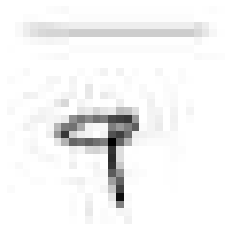

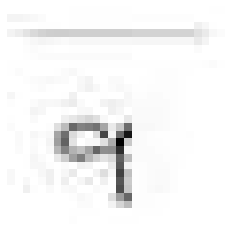

In [7]:
#확인
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
for i in new_X[-3:-1]:
    some_digit = i
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap=mpl.cm.binary)
    plt.axis("off")

    #save_fig("some_digit_plot")
    plt.show()


In [10]:
new_X[-3]

array([  0,   0,   0,   0,   0,   2,   3,   4,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   0,   1,
         2,   1,   0,   0,   2,   2,   1,   0,   0,   0,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         0,   0,   0,   0,   0,   4,  11,  17,  19,  18,  15,  13,  11,
        11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,
        11,  11,  19,  12,   3,   0,   0,   4,  12,  20,  25,  27,  27,
        26,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
        32,  32,  32,  32,  25,  16,   6,   1,   0,   1,   3,   5,   6,
         7,   6,   6,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   6,   1,   0,   0,   1,   0,   0,
         0,   0,   0,   0,   0,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   0,   0,   0,   0,   0,
         0,   0,   1,   2,   3,   4,   5,   0,   0,   0,   0,   